

# **Basit Doğrusal Regresyon Örneği**

---

Bu projemizde reklam harcamalarımız ile satış arasındaki ilişkiyi modelleyeceğiz.


In [ ]:
import pandas as pd #pandas kütüphanemizi ,verilerimizi okumak için projemize dahil ediyoruz.
import numpy as np #Veriler üzerinde işlem yapmamızı sağlayan Numpy kütüphanemizi projemize dahil ediyoruz.


 df = pd.read_csv("/content/Advertising.csv") #Pandas ile verimizi okuyoruz
 df = df.iloc[:,1:len(df)]
 df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


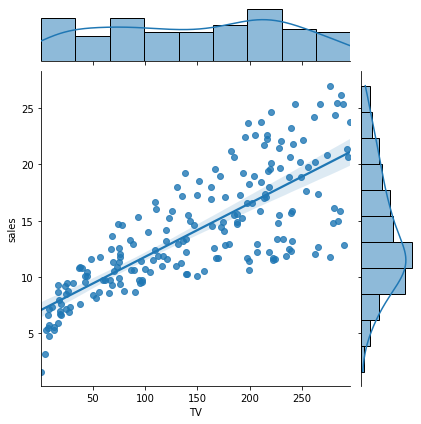

In [ ]:
import  seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg"); #Her tv reklamı verildiği zaman ki satışlarımıza bakıyoruz

# **Model Kurmak**
Burada Sklearn kütüphanemizi kullanarak modelimizi oluşturuyoruz.

In [ ]:
from sklearn.linear_model import LinearRegression #liner regresyon fonksiyonunu dahil ediyoruz.

In [ ]:
X=df[["TV"]] #Bağımsız değişkenimiz

In [ ]:
y=df[["sales"]]#Bağımlı değişkenimiz

In [ ]:
reg=LinearRegression() #Model nesnesi oluşturuyoruz.

In [ ]:
model=reg.fit(X,y) #Bağımsız ve bağımlı değişkenimiz ile modelimizi fit ettik (Kurduk).

In [ ]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [ ]:
dir(model) #burada modelimiz içinden alabileceğimiz değerleri görüyoruz.Biz b0 sabiti için intercept'i  ve b1 katsayısı için coef'i çekiceğiz.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
model.intercept_

array([7.03259355])

In [ ]:
model.coef_

array([[0.04753664]])


>R^2 (Rkare) Model skoru belirleme:

B bağımlı değişken deki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir.
farklı bir değişle elimizde ki bağımsız değişkenleri kullandığımızda ,bağımlı değişkende ki değişim yüzde kaçını açıklayabiliyoruz ?
Bu örnekte satışlardaki değişiklik yaklaşık %60'ı  bağımsız değişkence açıklanmaktadır.

In [ ]:
#Rkare değerini öğrenme
model.score(X,y)

0.611875050850071


---
# **Model İle Tahmin Üretme** 

Sklearn kütüphanesi ile tahminlerde bulunucağız.Burada yapıcagımız regresyonda daha cok modelimizin skorunu yükseltmek amacı ile yapıyor olacağız.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


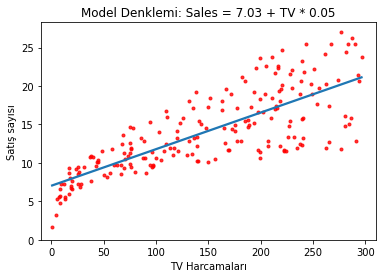

In [ ]:
#regresyon için görselleştirme yapıyoruz
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"],ci=None ,scatter_kws={'color':'r','s':9} )  #Tv ve sales değişkenlerini kullanıyoruz.Güven aralığı koymuyoruz.
g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05") #grafik başlığı
g.set_ylabel("Satış sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310) #limitlerini beliliyoruz
plt.ylim(bottom=0);

Burada görmüş olduğumuz grafikte kırmızılar gerçek satış değerlerini , mavi doğru ise bizim noktalar üzerinden oluşturduğumuz modelin denklemi ifade ediyor.

Sales = 7.03 + 0.04*TV



In [ ]:
model.predict([[165]]) #Burada oluşturduğumuz model üzerinden tahmin etme işlemi gerçekleştiriyoruz.

array([[14.87613922]])

In [ ]:
yeni_veri=[[5],[15],[30]] #birden fazla işlem girmek istediğimizde

In [ ]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# **Artıklar Ve Makine Öğrenmesinde ki Önemi** 

In [ ]:
y.head(10) #Burada satışların gerçek değerlerini görüyoruz.Bağımlı değkenin değerlerini görüyoruz.

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [ ]:
model.predict(X)[0:6] #Burada tv harcamalarını(X) kullanarak satışlarımızı tahmin ediyoruz.

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [ ]:
gercek_y=y[0:10] #Yden 10 tane değer alıyoruz.

In [ ]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10]) #tahmin ettiğimiz değerlerden 10 tane değer alıyoruz

In [ ]:
hatalar=pd.concat([gercek_y,tahmin_edilen_y],axis=1) #tahmin edilen y ile gerçek y'yi tek bir framede toplayıp,hatalarımızı görüyoruz.

In [ ]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]

In [ ]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [ ]:
hatalar["hata"]=hatalar["gercek_y"]-hatalar["tahmin_edilen_y"] #Hataları görebilmek için gerçek değerlerden çıkarıyoruz

In [ ]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [ ]:
#ortalama bir hata bulmak için mse(Hata Kareler Ortalamasını)hesaplıyoruz. 
hatalar["hata_kareleri"]=hatalar["hata"]**2

In [ ]:

hatalar


,gercek_y,tahmin_edilen_y,hata,hata_kareleri
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [ ]:
np.mean(hatalar["hata_kareleri"]) #hata kareler ortalaması(Seçtiğimiz on değerde) hesaplıyoruz.

9.290350329638102